# DAAN 862 Lesson 10 Assignment 1

In [113]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV


In [115]:
# Load Breast Cancer dataset
data = pd.read_csv('breastcancer.csv')

## Question 1:  Explore the Brest Cancer Data

In [118]:
# Overview of the data
print("Dataset Shape:", data.shape)
print("First few rows of the dataset:\n", data.head())
print("\nData types and missing values:\n", data.info())

Dataset Shape: (116, 10)
First few rows of the dataset:
    Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float

In [120]:
# Statistical Summary of the dataset
print("\nStatistical Summary:\n", data.describe())


Statistical Summary:
               Age         BMI     Glucose     Insulin        HOMA      Leptin  \
count  116.000000  116.000000  116.000000  116.000000  116.000000  116.000000   
mean    57.301724   27.582111   97.793103   10.012086    2.694988   26.615080   
std     16.112766    5.020136   22.525162   10.067768    3.642043   19.183294   
min     24.000000   18.370000   60.000000    2.432000    0.467409    4.311000   
25%     45.000000   22.973205   85.750000    4.359250    0.917966   12.313675   
50%     56.000000   27.662416   92.000000    5.924500    1.380939   20.271000   
75%     71.000000   31.241442  102.000000   11.189250    2.857787   37.378300   
max     89.000000   38.578759  201.000000   58.460000   25.050342   90.280000   

       Adiponectin    Resistin        MCP.1  Classification  
count   116.000000  116.000000   116.000000      116.000000  
mean     10.180874   14.725966   534.647000        1.551724  
std       6.843341   12.390646   345.912663        0.499475  

In [122]:
# Check for missing values
print("\nMissing values in each column:\n", data.isnull().sum())


Missing values in each column:
 Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64


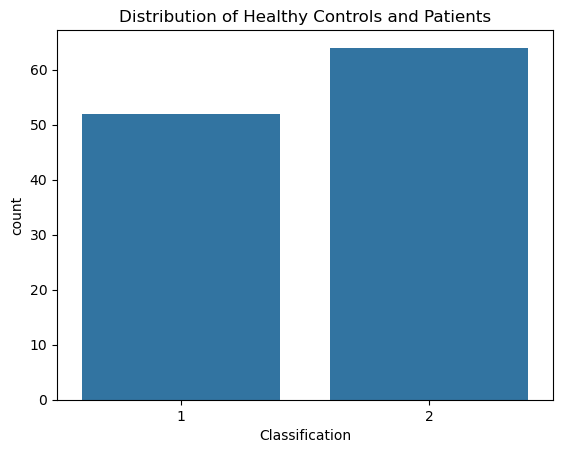

In [124]:
# Distribution of the target variable (Classification)
sns.countplot(data=data, x='Classification')
plt.title('Distribution of Healthy Controls and Patients')
plt.show()

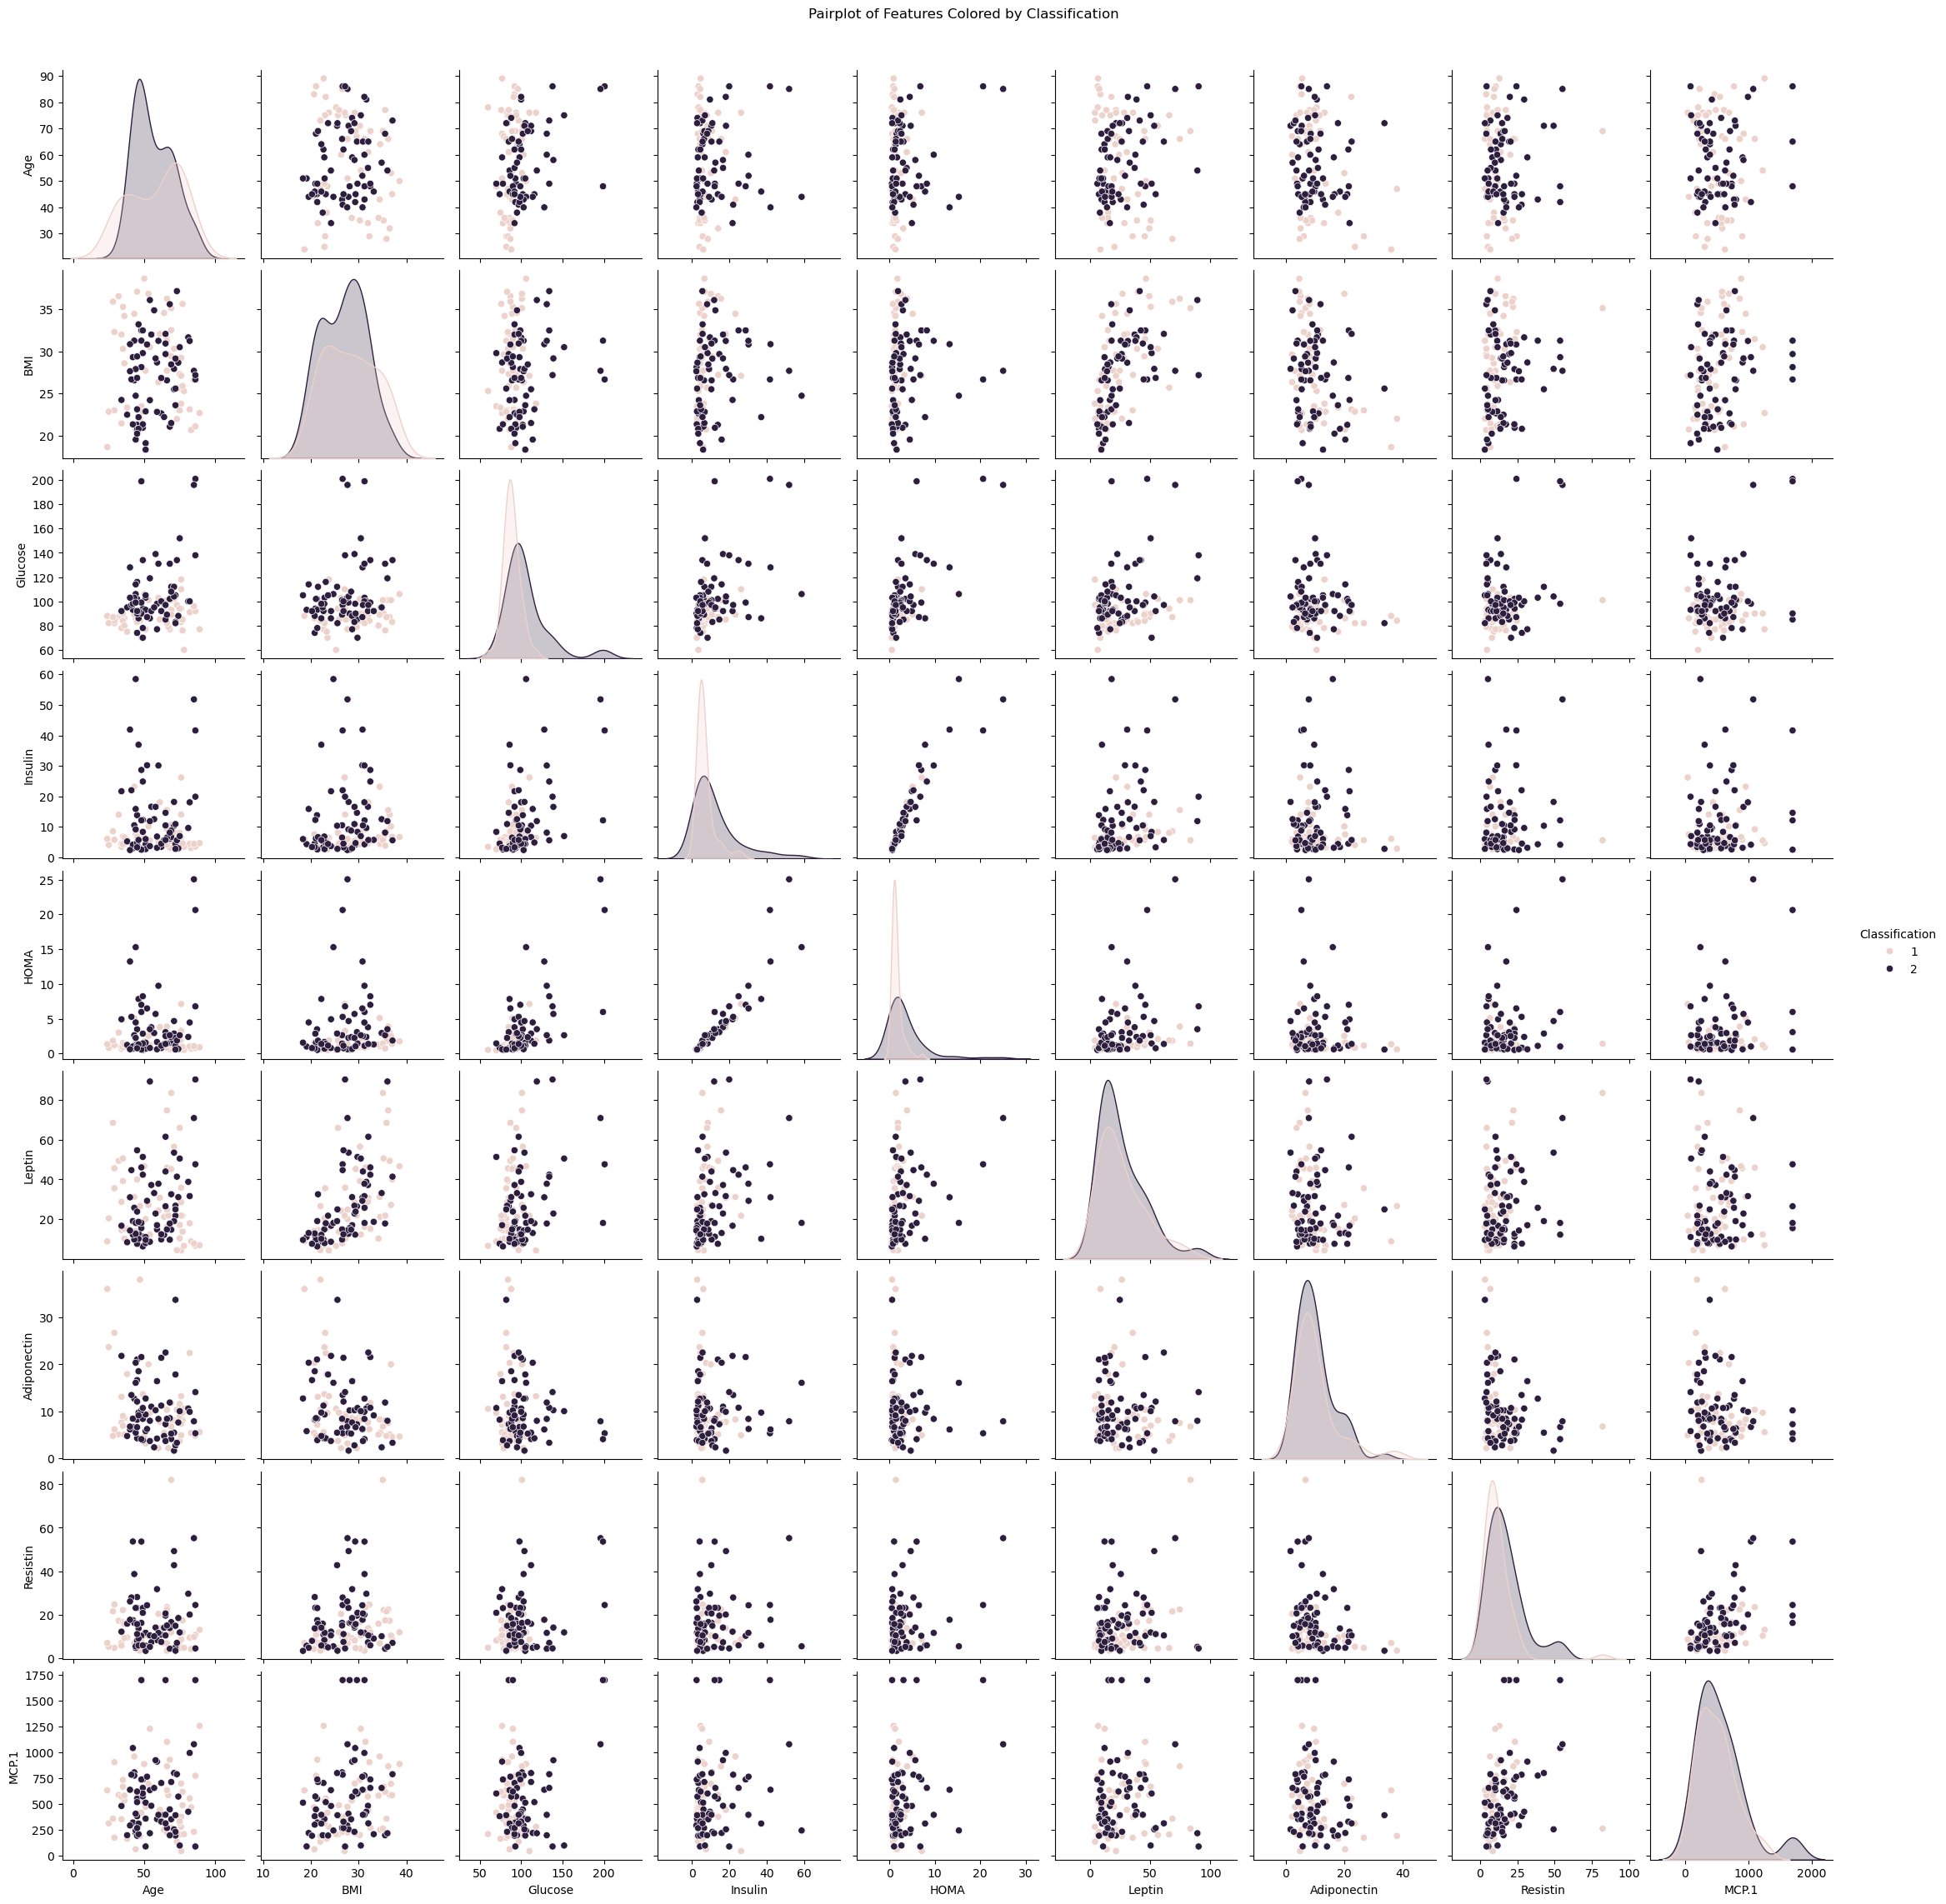

In [126]:
# Pairplot to see relationships (can be slow with large data)
sns.pairplot(data, hue='Classification', diag_kind='kde')
plt.suptitle("Pairplot of Features Colored by Classification", y=1.02)
plt.show()

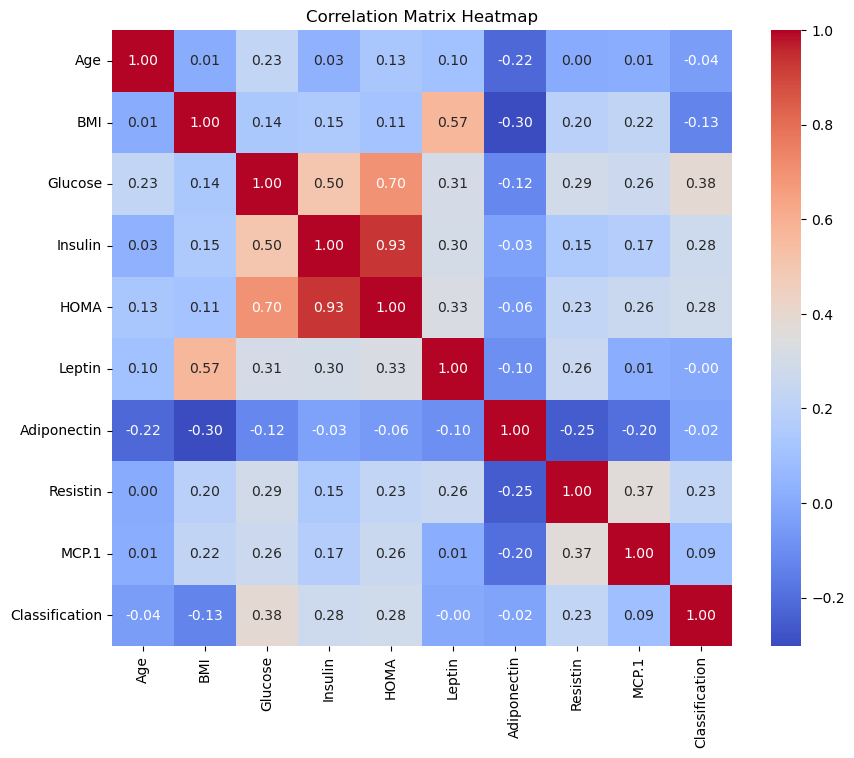

In [127]:
# 6. Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

## Question 2: Build and evaluate SCV models with different kernel function



In [129]:
# Separate features and target variable
X = data.drop(columns=['Classification'])
y = data['Classification']

In [130]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [131]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [132]:
# 1. Building and Evaluating SVC models with different kernels
print("Support Vector Classifier (SVC) with different kernels:")

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    svc = SVC(kernel=kernel)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    print(f"\nKernel: {kernel}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

Support Vector Classifier (SVC) with different kernels:

Kernel: linear
Accuracy: 0.8
              precision    recall  f1-score   support

           1       0.73      0.94      0.82        17
           2       0.92      0.67      0.77        18

    accuracy                           0.80        35
   macro avg       0.83      0.80      0.80        35
weighted avg       0.83      0.80      0.80        35


Kernel: poly
Accuracy: 0.6571428571428571
              precision    recall  f1-score   support

           1       0.78      0.41      0.54        17
           2       0.62      0.89      0.73        18

    accuracy                           0.66        35
   macro avg       0.70      0.65      0.63        35
weighted avg       0.69      0.66      0.64        35


Kernel: rbf
Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           1       0.88      0.82      0.85        17
           2       0.84      0.89      0.86        18

    accurac

## Question 3: Find the best n_estimator for Random Forests model

In [134]:
# Parameter grids for each model
rf_param_grid = {'n_estimators': [10, 50, 100, 150, 200]}
ada_param_grid = {'n_estimators': [10, 50, 100, 150, 200]}



In [135]:
# Random Forest Grid Search
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'n_estimators': [10, 50, 100, 150, 200]},
             scoring='accuracy')

In [136]:
# Best Random Forest results
best_rf_n_estimators = rf_grid.best_params_['n_estimators']
best_rf_accuracy = rf_grid.best_score_
print("Random Forest:")
print(f"Best n_estimators: {best_rf_n_estimators}")
print(f"Best Accuracy: {best_rf_accuracy:.4f}")

Random Forest:
Best n_estimators: 10
Best Accuracy: 0.7647


## Question 4: Find the best n_estimator for Adaboost mode

In [138]:
# AdaBoost Grid Search with SAMME algorithm to avoid warnings
ada = AdaBoostClassifier(algorithm='SAMME', random_state=42)
ada_grid = GridSearchCV(ada, ada_param_grid, cv=5, scoring='accuracy')
ada_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(algorithm='SAMME', random_state=42),
             param_grid={'n_estimators': [10, 50, 100, 150, 200]},
             scoring='accuracy')

In [146]:
# Best AdaBoost results
best_ada_n_estimators = ada_grid.best_params_['n_estimators']
best_ada_accuracy = ada_grid.best_score_
print("\nAdaBoost:")
print(f"Best n_estimators: {best_ada_n_estimators}")
print(f"Best Accuracy: {best_ada_accuracy:.4f}")


AdaBoost:
Best n_estimators: 50
Best Accuracy: 0.7662
